# Lecture 19

## Joint, Conditional and Marginal Distributions; 2D LOTUS; Expected Distance between Uniforms; Chicken-Egg Problem

### Joint, Conditional and Marginal Distributions

#### Joint CDF
A joint CDF is simply where we are dealing with multiple random variables. As an example, a case where we have two random variables $X, Y$, the joint CDF of two random variables $X, Y$ can be expressed as:

\begin{align}
  F(x,y) &= P(X \le x, Y \le y)
\end{align}

Note that the random variables may be discrete, continuous, or a mixture of both.

#### Joint PDF
The joint PDF, in the case of _continuous_ random variables, is what you would _integrate_ to get the joint CDF. Continuing with our example of two (continous) random variables, we have:

\begin{align}
  f(x,y) &= \frac{\partial^2}{\partial{x}\partial{y}} F(x,y)
\end{align}

Conversely, if we want to know the probability of $X,Y$ in some set $A$, we _integrate_ the density to get that probability.

\begin{align}
  P\left((X,Y) \in A\right) &= \iint\limits_{A} f(x,y) \, dxdy
\end{align}

Integrate by holding one variable constant, and then do the other. The key thing is to be sure to get the _limits of integration_ correct.

#### Marginal PDF
The _marginal PDF of $X$_ is obtained by _integrating out the $Y$_. Recall the $X,Y$ contigency table and the definition of marginal probability.

\begin{align}
  \int_{-\infty}^{\infty} f(x,y) \, dy
\end{align}

Notice that by keeping $X$ constant and _integrating over all $Y$_, the marginal PDF of $X$ no longer depends on $Y$.

And we can do vice-versa for the marginal PDF of $Y$, but keeping $Y$ constant and _integrating over all $X$_.

Do not forget that taking the marginal PDF of $X$ and then integrating over all $X$, we should get 1.0.

\begin{align}
  \int\limits_{-\infty}^{\infty} \int\limits_{-\infty}^{\infty} f(x,y) \, dx dy &= 1.0
\end{align}

#### Conditional PDF

Given that we know $X$, what is the appropriate PDF for $Y$?

Well, we can apply what we know about _conditional probability_ to get a conditional PDF.

\begin{align}
  f_{Y|X} (y|x) &= \frac{f_{XY}(x,y)}{f_{X}(x)} \\
    &= \frac{f_{X|Y}(x|y) \, f_{Y}(y)}{f_{X}(x)}
\end{align}

This is completely analogous to conditional probability. 

#### Independence

$X,Y$ are independent if

\begin{align}
  f_{X,Y}(x,y) &= f_{X}(x) \, f_{Y}(y) &\quad \text{for all }x, y \text{ from PDF p.o.v.} \\
  \\
  F(x,y) &= F(x) \, F(y) &\quad \text{for all }x, y \text{ from CDF p.o.v.} 
\end{align}

These statements are equivalent, but in most cases it might be easier to work the PDFs.

----

### A Uniform example

Let's revisit that distribution that is uniform on the unit disc $x^2 + y^2 = 1$.

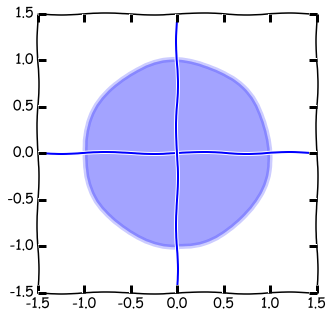

In [15]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

plt.xkcd()

fig = plt.figure(figsize = (5.0,5.0))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
circ = plt.Circle((0, 0), radius=1.0, color="b", alpha=0.2, lw=5)
ax.add_patch(circ)
plt.axhline(0)
plt.axvline(0)
plt.show()

#### Joint PDF

The joint PDF is required to integrate to 1.0 and so we have

\begin{align}
  f_{XY}(x,y) &= 
    \begin{cases}
      \frac{1}{\pi}  & \quad \text{if } x^2 + y^2 \le 1 \\
      0  & \quad \text{otherwise}\\
    \end{cases}
\end{align}

#### Marginal PDF of $X$

\begin{align}
  f_{X}(x) &= \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \frac{1}{\pi} dy \\
  \\
  &= \frac{2}{\pi} \sqrt{1-x^2} &\quad \text{where } -1 \le x \le 1
\end{align}

Notice that while the joint PDF is Uniform, the marginal PDF is not Uniform: it grows as $x$ approaches 0. 

By _symmetry_ we can just replace $x$ with $y$ to get $f_{Y}(y)$

#### Conditional PDF of $Y|X$

\begin{align}
  f_{Y|X}(y|x) &= \frac{f_{XY}(x,y)}{f_{X}(x)} \\
  &= \frac{\frac{1}{\pi}}{\frac{2}{\pi} \sqrt{1-x^2}} \\
  &= \frac{1}{2 \sqrt{1-x^2}} &\quad \text{if } -\sqrt{1-x^2} \le y \le \sqrt{1-x^2}
\end{align}

But since we are treating $x$ as a constant, and the above equation does not _depend on $y$_, $f_{Y|X}(y|x)$ is actually Uniform.

\begin{align}
  Y|X &\sim Unif(-\sqrt{1-x^2}, \sqrt{1-x^2}) &\quad \text{or also } \\
  \\
  Y|X=x \, &\sim Unif(-\sqrt{1-x^2}, \sqrt{1-x^2})
\end{align}

#### Non-independence

Since in our example above

\begin{align}
  f_{XY}(x,y) \neq f_{X}(x) \, f_{Y}(y)
\end{align}

we can see that $X,Y$ are not independent.

Or, because the _unconditional_ distribution of $Y$ is not the same as the _conditional_ distribution of $Y|X$, it necessarily follows that $X,Y$ are not independent as learning $X$ gives us information.
